In [1]:
from medpy.io import load
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

Where the usual graphcut constructs a graph out of the image's voxels, the label graphcut used irregular regions instead. This reduces memory consumption, accelerates the execution and leads mostly to better results.

<table>
<tr>
<td><img alt="" src="images/b0.png" width="200" /></td>
<td><img alt="" src="images/b0wmarker.png" width="200" /></td>
</tr>
<tr>
<td>Original image</td>
<td>Foreground (red) and background (green) marker on original image</td>
</tr>
</table>

Let's assume we want to segment the ventricles in a brain scan (left image). First, we need some markers for foreground (red) and background (green). These can be seen in the right image and are usually either created manually or by another algorithm.

## Creating the region image


The label graphcut requires a region image. **MedPy** supplies the required functionalities. First, we create a gradient magnitude version of our original image with

In [2]:
!medpy_gradient.py resources/b0.nii.gz output/gradient.nii.gz -f

Which we then feed to the watershed algorithm

In [8]:
!medpy_watershed.py output/gradient.nii.gz output/watershed.nii.gz --mindist 10 -f

Note that this script requires the `skimage` package, which can be installed with `pip install scikit-image`.

Visually, the result process like this
<table>
<tr>
<td><img alt="Original image" src="images/b0.png" width="200" /></td>
<td><img alt="Region image" src="images/b0gradient.png" width="200" /></td>
<td><img alt="Region image" src="images/watershed.png" width="200" /></td>
<td><img alt="Region image (colored)" src="images/watershed_colored.png" width="200" /></td>
</tr>
<tr>
<td>Original image</td>
<td>Gradient image</td>
<td>Region image</td>
<td>Region image (colored)</td>
</tr>
</table>

## Performing the graphcut

Now we just have to supply our images to the script

In [6]:
!medpy_graphcut_label.py output/gradient.nii.gz output/watershed.nii.gz resources/b0markers.nii.gz output/graphcut_label.nii.gz --boundary=stawiaski

And, after some waiting time, we obtain
<img alt="" src="images/b0gclabelstawiaski.png" width="300" />

, which is a pretty good approximation of the ventricles visible in the brain scan.

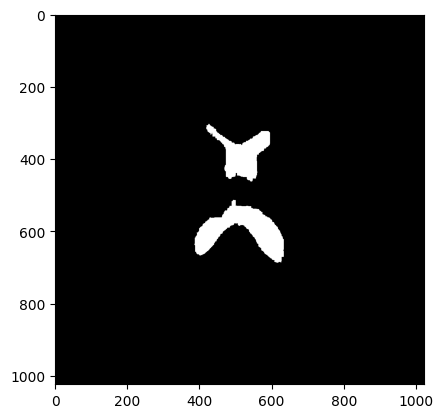

In [7]:
o, _ = load("output/graphcut_label.nii.gz")
plt.imshow(o, cmap = cm.Greys_r)